In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data in the python environment
data = pd.read_csv('titanic_dataset (1).csv')

In [3]:
#Displaying first 5 rows in the data set
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# step 3 EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape  # checking the no.of rows and columns

(891, 12)

In [7]:
data=data.set_index(['PassengerId'])  # Making PassengerId as index

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#finding the unique values in the column 'Sex'
data['Sex'].nunique()

2

In [10]:
data['Sex'].unique() # the unique values in 'Sex'

array(['male', 'female'], dtype=object)

In [11]:
# checking for the null values in the data set
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

there are null values in the columns 'Age', 'Cabin' and 'Embarked'---->
we have to handle the null values

In [12]:
#data.drop(['Name','Ticket','Cabin'],axis=1,inplace= True)--->method 1

In [13]:
# Drop column of index using DataFrame.iloc[] and drop() methods  2.
data.drop(data.iloc[:,2:3],axis = 1,inplace=True)  # Dropping the column 'Name'

In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.drop(data.iloc[:,6:7],axis = 1,inplace=True)  # Dropping the column 'Ticket'

In [16]:
data.drop(data.iloc[:,7:8],axis = 1,inplace=True) # Dropping the column ' Cabin'

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [18]:
# filling the null values
data['Age'] =data['Age'].fillna(value= data['Age'].median())
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
# Some categorical values are there--->so we will encode
#3e one hot encoding of categorical columns
cat_col =['Sex','Embarked']  # column "sex" and 'Embarked ' assigned to a variable
cat_col_encoded=pd.get_dummies(data[cat_col],prefix_sep='-',drop_first=False,sparse=False) # one hot encoding for that particular columns
data =data.drop(data[cat_col],axis=1)  # dropping the original columns
data=pd.concat([data,cat_col_encoded],axis=1)  # concatenating the encoded columns to the original data set
data.head()  # dispalying the encoded dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-female,Sex-male,Embarked-C,Embarked-Q,Embarked-S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
 # Splitting target and feature
X= data.drop('Survived',axis=1)
y= data['Survived']

In [22]:
# importing libraries
from sklearn.model_selection import train_test_split
# splitting train test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# SVM ---->Linear

In [23]:
from sklearn.svm import SVC # Importing the libraries

In [24]:
svm_clf = SVC(kernel='linear')  # linear svm 
svm_model = svm_clf.fit(X_train,y_train)  # fitting the model

In [25]:
score_svm =svm_model.score(X_test,y_test)  # finding the score
print("Score for SVM  Linear Model:",score_svm)

Score for SVM  Linear Model: 0.7821229050279329


# SVM ---->RBF

In [26]:
svm_clf_r = SVC(kernel='rbf')  # linear svm 
svm_model_r = svm_clf_r.fit(X_train,y_train)  # fitting the model

In [27]:
score_svm_r =svm_model_r.score(X_test,y_test)  # finding the score
print("Score for SVM RBF Model:",score_svm_r)

Score for SVM RBF Model: 0.659217877094972


# K-Fold validation for SVM----->Linear

In [28]:
from sklearn.model_selection import KFold  # importing the libraries

In [29]:
kfold_validator =KFold(10) # validator value set to 10

In [30]:
for train_index,test_index in kfold_validator.split(X,y):
    print("Training Index",train_index)
    print("Test Index",test_index)

Training Index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

 881 882 883 884 885 886 887 888 889 890]
Test Index [535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552
 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570
 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588
 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606
 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623]
Training Index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 14

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cv_result = cross_val_score(svm_model,X,y,cv=kfold_validator)
print("Cross Validation Result :",cv_result)

Cross Validation Result : [0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]


In [33]:
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [34]:
print("Cross Validation Result of KFold  for SVM Linear Model:",np.mean(cv_result) ) # cross validation score

Cross Validation Result of KFold  for SVM Linear Model: 0.786729088639201


# K-Fold validation for SVM----->RBF

In [35]:
cv_result_r = cross_val_score(svm_model_r,X,y,cv=kfold_validator)
print("Cross Validation Result :",cv_result_r)

Cross Validation Result : [0.6        0.6741573  0.66292135 0.6741573  0.66292135 0.71910112
 0.65168539 0.74157303 0.73033708 0.69662921]


In [36]:
print("Cross Validation Result of KFold  for SVM RBF Model:",np.mean(cv_result_r) ) # cross validation score

Cross Validation Result of KFold  for SVM RBF Model: 0.6813483146067416


# Stratified K-Fold Cross Validation

In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
skfold_validator = StratifiedKFold(n_splits=10)

In [39]:
for train_index,test_index in skfold_validator.split(X,y):
    print("Training Index:",train_index)
    print("Test Index :",test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

# 1.For SVM Linear

In [40]:
skcv_result = cross_val_score(svm_model,X,y,cv=skfold_validator)

In [41]:
skcv_result 

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [42]:
print("Cross validation score for Stratified KFold  for SVM Linear Model :",np.mean(skcv_result)) 

Cross validation score for Stratified KFold  for SVM Linear Model : 0.786729088639201


# 2.For SVM RBF

In [43]:
skcv_result_r = cross_val_score(svm_model,X,y,cv=skfold_validator)
skcv_result_r

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [44]:
print("Cross validation score for Stratified KFold  for SVM RBF Model :",np.mean(skcv_result_r)) 

Cross validation score for Stratified KFold  for SVM RBF Model : 0.786729088639201


# KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [47]:
metric_k =[]
neighbors = range(3,15)

for k in neighbors:
    KNN_model =KNeighborsClassifier(n_neighbors=k)
    KNN_model =KNN_model.fit(X_train,y_train)
    y_pred_KNN = KNN_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)
    

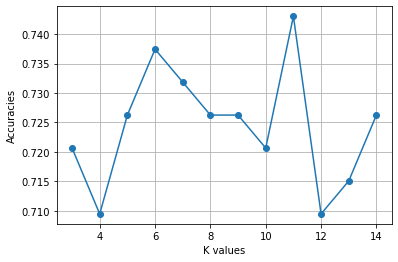

In [48]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K values")
plt.ylabel("Accuracies")
plt.grid()

# from the graph it is clear that neighbors =11 -->k value with highest  accuracy 

In [49]:
KNN_model =KNeighborsClassifier(n_neighbors=11)
KNN_model =KNN_model.fit(X_train,y_train)

In [50]:
score_KNN = KNN_model.score(X_test,y_test)

In [51]:
print("score of KNN model :",score_KNN)

score of KNN model : 0.7430167597765364


# KFold Cross Validation for KNN

In [52]:
kfold_validator = KFold(10)

In [53]:
for train_index,test_index in kfold_validator.split(X,y):
    print("Training Index :",train_index)
    print("Test Index:",test_index)

Training Index : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [54]:
cv_result_KNN = cross_val_score(KNN_model,X,y,cv=kfold_validator)

In [55]:
cv_result_KNN

array([0.66666667, 0.6741573 , 0.66292135, 0.70786517, 0.68539326,
       0.75280899, 0.71910112, 0.73033708, 0.76404494, 0.76404494])

In [56]:
print("cross validation score of kfold for knn model",np.mean(cv_result_KNN))

cross validation score of kfold for knn model 0.7127340823970038


# Stratified Cross validation  for KNN Model

In [57]:
skfold_validator =StratifiedKFold(n_splits=10)

In [58]:
for train_index,test_index in skfold_validator.split(X,y):
    print("Training Index :",train_index)
    print("Test Index:",test_index)

Training Index : [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [59]:
skcv_result_KNN = cross_val_score(KNN_model,X,y,cv=skfold_validator)

In [60]:
skcv_result_KNN

array([0.65555556, 0.61797753, 0.62921348, 0.76404494, 0.70786517,
       0.69662921, 0.75280899, 0.73033708, 0.73033708, 0.75280899])

In [61]:
# Average accuracy score for KNN model in stratified cross validation model
print("Cross Validation score of Stratified kfold for KNN model",np.mean(skcv_result_KNN))

Cross Validation score of Stratified kfold for KNN model 0.7037578027465667


In [62]:
## Cross validation score for diffenrent models on kfold and Stratified kfold
#1.Score for SVM  Linear Model: 0.7821229050279329
#2.Cross Validation Result of KFold  for SVM Linear Model: 0.786729088639201
#3.Cross validation score for Stratified KFold  for SVM Linear Model : 0.786729088639201
#4.Score for SVM RBF Model: 0.659217877094972
#5.Cross Validation Result of KFold  for SVM RBF Model: 0.6813483146067416
#6.Cross validation score for Stratified KFold  for SVM RBF Model : 0.786729088639201
#7.score of KNN model : 0.7430167597765364
#8.cross validation score of kfold for knn model 0.7127340823970038
#9.Cross Validation score of Stratified kfold for KNN model 0.7037578027465667

In [ ]:
# Best cross validation score for 
#1. kfold---->SVM(Linear)& Stratified Kfold--->SVM(Linear& RBF) ==0.786729088639201
